In [2]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt


In [12]:
import netCDF4 as nc
import numpy as np
import pyproj

### Checking that (x_coordinates, y_coordinates) match (longitude_layerData, latitude_layerData)

In [17]:
dd=nc.Dataset(filepath, 'r')
xx = dd.variables['x_coordinates'][:].data
yy = dd.variables['y_coordinates'][:].data
lat = dd.variables['latitude_layerData'][:].data
lon = dd.variables['longitude_layerData'][:].data

In [18]:
print(len(xx), len(lat))

12048 12048


Text(0, 0.5, 'Northing (m)')

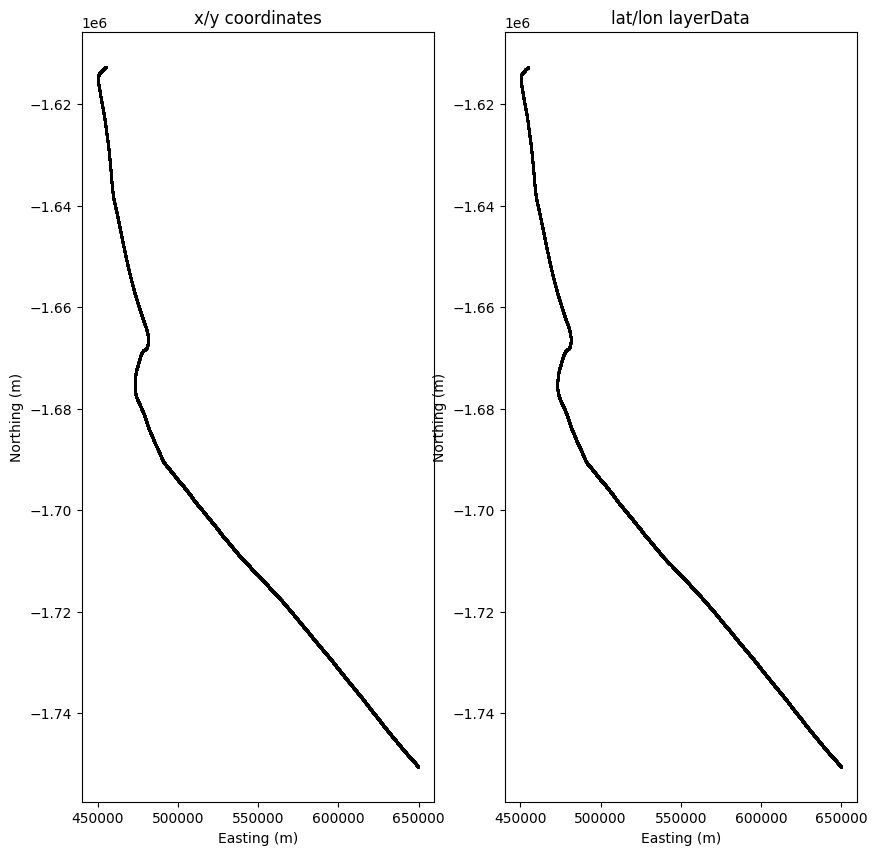

In [19]:
ps71=pyproj.Proj('epsg:3031')
x2, y2 = ps71.transform(lon, lat)

fig = plt.figure(figsize=(10, 10))
ax1, ax2 = fig.subplots(1, 2)

ax1.plot(xx, yy, 'k.', markersize=2)
ax1.set_title("x/y coordinates")
ax1.set_xlabel("Easting (m)")
ax1.set_ylabel("Northing (m)")

ax2.plot(x2, y2, 'k.', markersize=2)
ax2.set_title("lat/lon layerData")
ax2.set_xlabel("Easting (m)")
ax2.set_ylabel("Northing (m)")


### Subsampling tracks

In [28]:
def extract_bas_track(filepath):
    """
    Extrack geographic location of all traces from a BAS netCDF file.
    """
    dd=nc.Dataset(filepath, 'r')
    lat = dd.variables['latitude_layerData'][:].data
    lon = dd.variables['longitude_layerData'][:].data
    return lat, lon


In [29]:
# Takendirectly from subsample_bedmap.ipynb
def subsample_tracks(lat, lon, min_spacing):
    '''
    Subsample the input coordinates so sequential points are separated by at least min_spacing.
    This assumes that the BEDMAP CSVs provide coordinate in sequential order w/r/t data collection
    '''
    geod = pyproj.Geod(ellps="WGS84")
    lengths = geod.line_lengths(lon, lat)
    keep_idxs = [0]

    cumulative_dist = 0
    for idx, segment_dist in enumerate(lengths):
        cumulative_dist += segment_dist
        if cumulative_dist >= min_spacing:
            keep_idxs.append(idx+1)  # Segment index idx is between point[idx] and point[idx+1]
            cumulative_dist = 0
    return lat[keep_idxs], lon[keep_idxs]


In [30]:
# This will be a configuration parameter for the eventual plugin
radargram_dir = "/Volumes/RadarData"

institution = "BAS"
survey = "WISE_ISODYN"
filename = "WISE_ISODYN_W14.nc"
filepath = "{}/{}/{}/{}".format(radargram_dir, institution, survey, filename)

lat, lon = extract_bas_track(filepath)
min_spacing = 200
lat, lon = subsample_tracks(lat, lon, min_spacing)

ps71=pyproj.Proj('epsg:3031')
sub_x, sub_y = ps71.transform(lon, lat)



In [31]:
lon

array([164.2398788, 164.2470133, 164.2541653, ..., 159.6480687,
       159.6432949, 159.6385409])

Text(0, 0.5, 'Northing (m)')

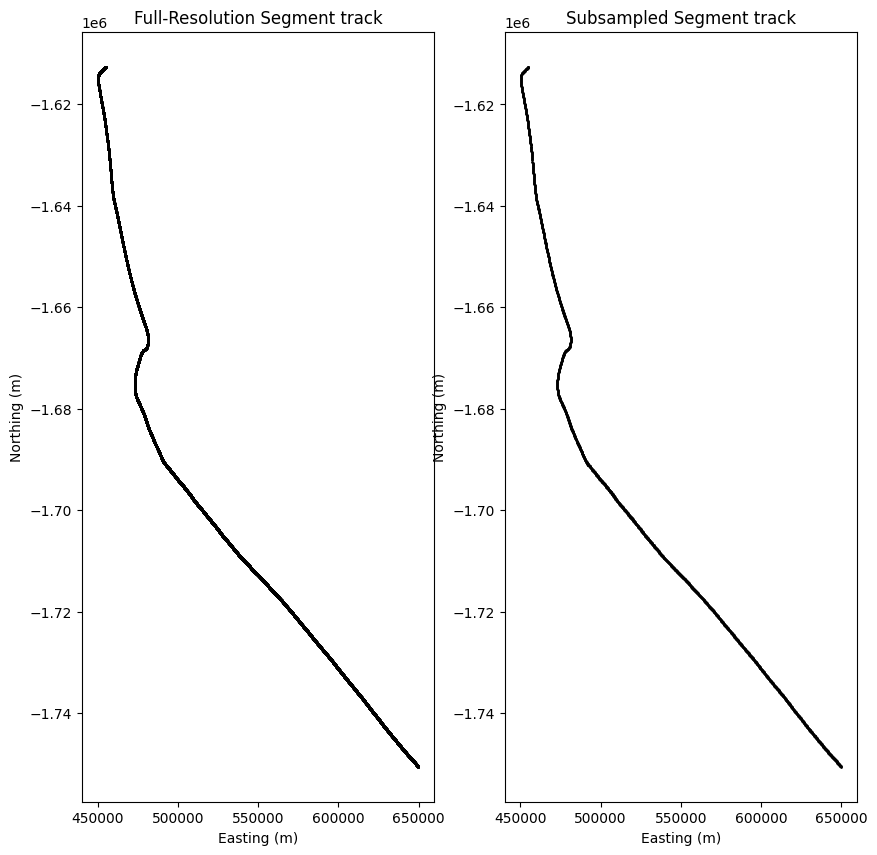

In [32]:
fig = plt.figure(figsize=(10, 10))
ax1, ax2 = fig.subplots(1, 2)

ax1.plot(xx, yy, 'k.', markersize=2)
ax1.set_title("Full-Resolution Segment track")
ax1.set_xlabel("Easting (m)")
ax1.set_ylabel("Northing (m)")

ax2.plot(sub_x, sub_y, 'k.', markersize=2)
ax2.set_title("Subsampled Segment track")
ax2.set_xlabel("Easting (m)")
ax2.set_ylabel("Northing (m)")

